# Decision Tree VAL

### Dataframe creation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train_cleaned.csv")
df.head()

name  duration_ms  explicit  popularity  \
0                             Long Road       241760     False          46   
1  Daniâl My Son, Where Did You Vanish?       444000     False           0   
2                    Ondskapens Galakse       333506     False           3   
3                       Can't Look Away       269800     False          23   
4                         Thunderground       307651     False          25   

                  artists              album_name  danceability  energy  key  \
0           Funki Porcini           Hed Phone Sex         0.690   0.513    5   
1           Siavash Amini    A Trail of Laughters         0.069   0.196    1   
2               Kvelertak              Nattesferd         0.363   0.854    2   
3       The Wood Brothers       One Drop of Truth         0.523   0.585    5   
4  The Darkraver;DJ Vince  Happy Hardcore Top 100         0.643   0.687    7   

   loudness  speechiness  acousticness  instrumentalness  liveness  valence  \
0   -12.529       0.0975      0.302000           0.53600     0.281   0.6350   
1   -24.801       0.0805      0.283000           0.93400     0.360   0.0336   
2    -7.445       0.0397      0.000089           0.80000     0.262   0.4890   
3    -5.607       0.0765      0.066400           0.00127     0.117   0.3850   
4   -11.340       0.0539      0.000576           0.09690     0.299   0.6370   

     tempo  time_signature        genre  
0  142.221             4.0      j-dance  
1   75.596             4.0      iranian  
2  116.628             4.0  black-metal  
3  140.880             4.0    bluegrass  
4  143.956             4.0        happy

### Partitioning

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df = df.replace({"explicit": {False:0, True:1}})

In [6]:
attributes = ['danceability', 'tempo', 'energy','loudness','acousticness','speechiness','instrumentalness','liveness','valence','key']

In [7]:
attributes

['danceability',
 'tempo',
 'energy',
 'loudness',
 'acousticness',
 'speechiness',
 'instrumentalness',
 'liveness',
 'valence',
 'key']

In [8]:
X = df[attributes].values
y = df["genre"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [10]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

### Decision Tree Classifier Pre-Pruning parameters

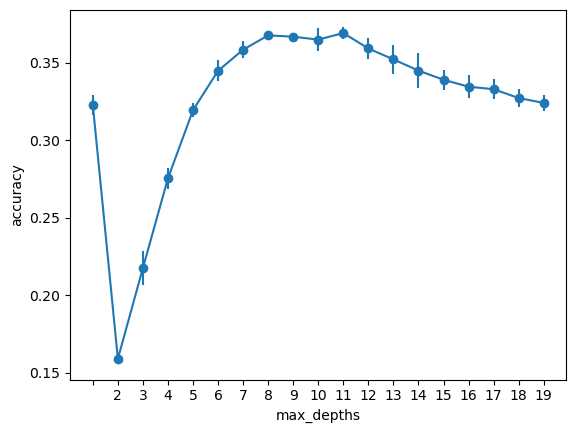

In [11]:
max_depths = [None] + list(np.arange(2, 20))
avg_scores = list()
std_scores = list()

for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='gini',max_depth=max_depth)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(max_depths)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(max_depths)), max_depths)
plt.xlabel("max_depths")
plt.ylabel("accuracy")
plt.show()

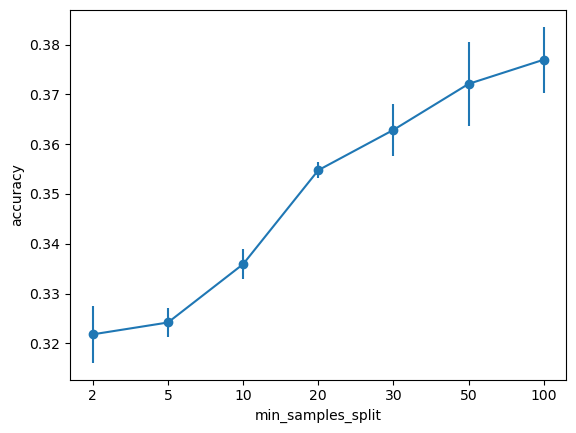

In [12]:
min_samples_splits = [2, 5, 10, 20, 30, 50, 100]
avg_scores = list()
std_scores = list()

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='gini',min_samples_split=min_samples_split)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(min_samples_splits)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(min_samples_splits)), min_samples_splits)
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.show()

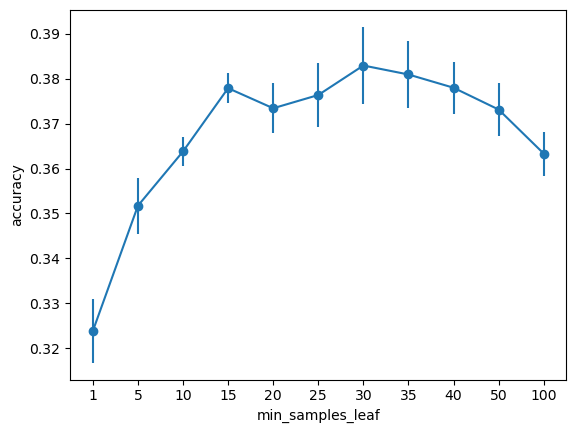

In [13]:
min_samples_leafs = [1, 5, 10, 15, 20, 25, 30, 35, 40, 50, 100]
avg_scores = list()
std_scores = list()

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='gini',min_samples_leaf=min_samples_leaf)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(min_samples_leafs)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(min_samples_leafs)), min_samples_leafs)
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.show()

### Decision Tree

In [14]:
dt = DecisionTreeClassifier(criterion='gini', min_samples_leaf=20, max_depth=12, min_samples_split=50)

In [15]:
%%time
dt.fit(X_train, y_train)

CPU times: total: 156 ms
Wall time: 191 ms


DecisionTreeClassifier(max_depth=12, min_samples_leaf=20, min_samples_split=50)

In [16]:
%%time
plt.figure(figsize=(20, 8), dpi=900)
plot_tree(dt, feature_names=attributes, filled=True)
plt.savefig('Decision tree VAL.png')
plt.show()

CPU times: total: 48.8 s
Wall time: 1min 38s


### Scores and Heatmap

In [17]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

In [18]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [19]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 0.4827619047619048
Train F1-score [0.33299697 0.68805704 0.53839365 0.30735456 0.34532374 0.56137012
 0.4702381  0.56840391 0.48218724 0.39166667 0.31317495 0.40232751
 0.45855759 0.53249097 0.477842   0.4873817  0.77623762 0.21187427
 0.70651204 0.44863732]

Test Accuracy 0.3748888888888889
Test F1-score [0.17266187 0.6625     0.42323651 0.24197531 0.25       0.44789357
 0.32038835 0.45756458 0.36111111 0.22222222 0.13895782 0.28996283
 0.38       0.43083004 0.37875289 0.40441176 0.74340528 0.11267606
 0.59751037 0.2955665 ]


In [20]:
print(classification_report(y_test, y_test_pred))

               precision    recall  f1-score   support

     afrobeat       0.19      0.16      0.17       225
  black-metal       0.62      0.71      0.66       225
    bluegrass       0.40      0.45      0.42       225
       brazil       0.27      0.22      0.24       225
    breakbeat       0.29      0.22      0.25       225
chicago-house       0.45      0.45      0.45       225
       disney       0.35      0.29      0.32       225
        forro       0.39      0.55      0.46       225
        happy       0.33      0.40      0.36       225
          idm       0.24      0.21      0.22       225
       indian       0.16      0.12      0.14       225
   industrial       0.25      0.35      0.29       225
      iranian       0.43      0.34      0.38       225
      j-dance       0.39      0.48      0.43       225
       j-idol       0.39      0.36      0.38       225
     mandopop       0.34      0.49      0.40       225
        sleep       0.81      0.69      0.74       225
      spa

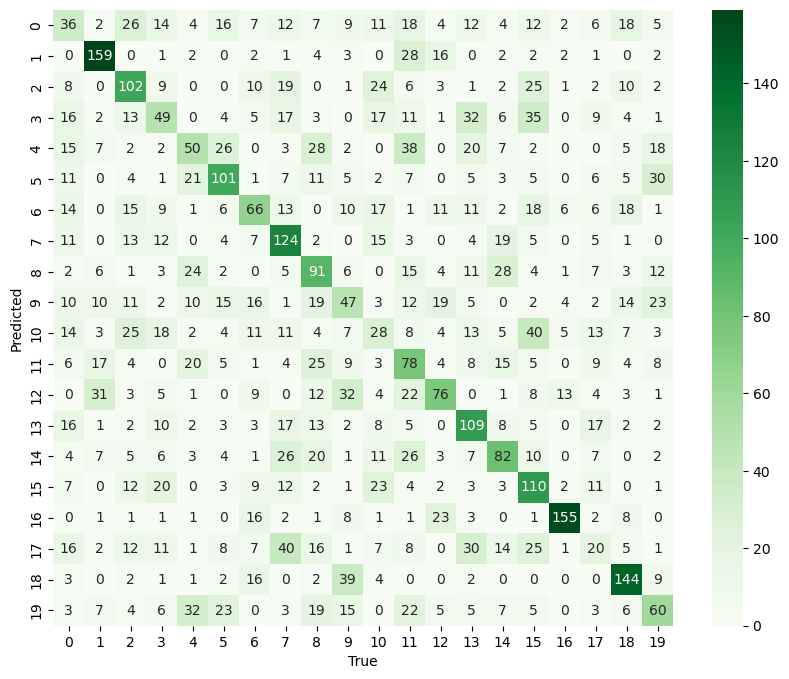

In [21]:
cf = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cf, annot=True, cmap="Greens", fmt='d')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

### Feature Importance

In [22]:
zipped = zip(attributes, dt.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

danceability 0.17765527532470016
acousticness 0.13611881531781966
loudness 0.13435404720876873
valence 0.11880916849285256
instrumentalness 0.11377858099770173
energy 0.10324536459989413
tempo 0.1027601215111002
speechiness 0.07686971528209866
liveness 0.031106996609783805
key 0.005301914655280315


In [23]:
dt.feature_importances_

array([0.17765528, 0.10276012, 0.10324536, 0.13435405, 0.13611882,
       0.07686972, 0.11377858, 0.031107  , 0.11880917, 0.00530191])

In [24]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 12,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 20,
 'min_samples_split': 50,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [25]:
dt.predict_proba(X_test)

array([[0.08510638, 0.        , 0.36170213, ..., 0.14893617, 0.        ,
        0.        ],
       [0.04545455, 0.        , 0.02272727, ..., 0.        , 0.13636364,
        0.11363636],
       [0.20895522, 0.        , 0.        , ..., 0.14179104, 0.00746269,
        0.04477612],
       ...,
       [0.        , 0.17647059, 0.        , ..., 0.02941176, 0.        ,
        0.02941176],
       [0.0483871 , 0.        , 0.03225806, ..., 0.06451613, 0.        ,
        0.        ],
       [0.04      , 0.        , 0.        , ..., 0.        , 0.        ,
        0.08      ]])

In [26]:
from sklearn.metrics import precision_score
precision_score(y_test,y_test_pred, average='micro')

0.3748888888888889

In [27]:
precision_score(y_test,y_test_pred, average='macro')

0.36705463032653063

In [28]:
feature_importance = pd.DataFrame(dt.feature_importances_, index = attributes).sort_values(0, ascending=False)
feature_importance

0
danceability      0.177655
acousticness      0.136119
loudness          0.134354
valence           0.118809
instrumentalness  0.113779
energy            0.103245
tempo             0.102760
speechiness       0.076870
liveness          0.031107
key               0.005302

<Axes: title={'center': 'Feature importance (Genres)'}>

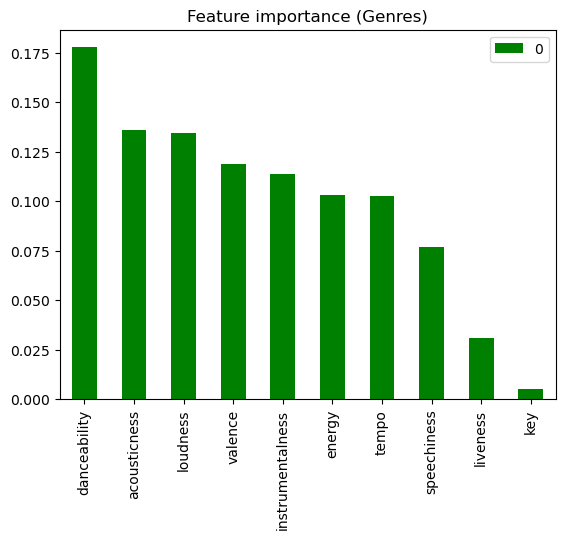

In [29]:
feature_importance.plot(kind='bar', color='green', title='Feature importance (Genres)')

### ALPHA

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

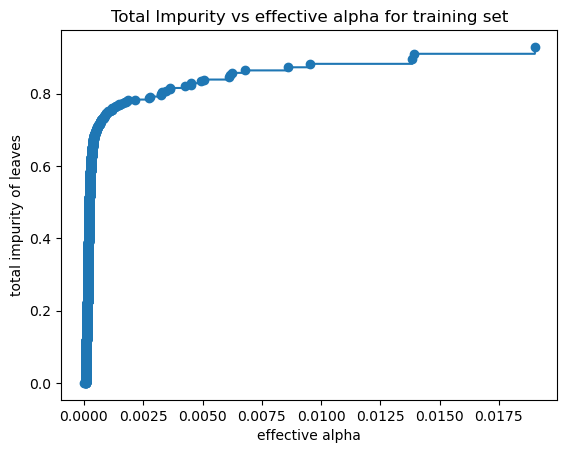

In [30]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [31]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.02119343825850084


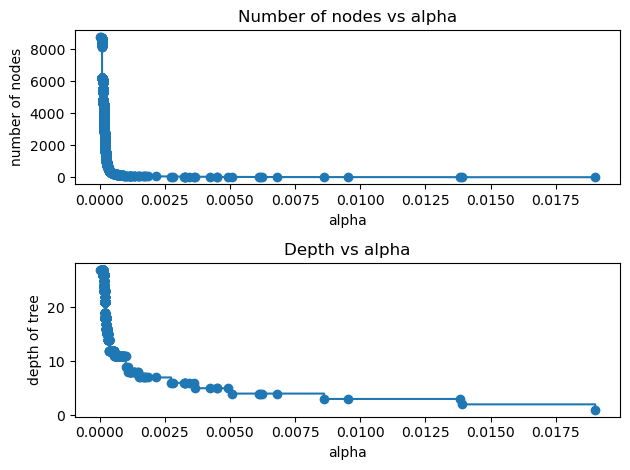

In [32]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [33]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

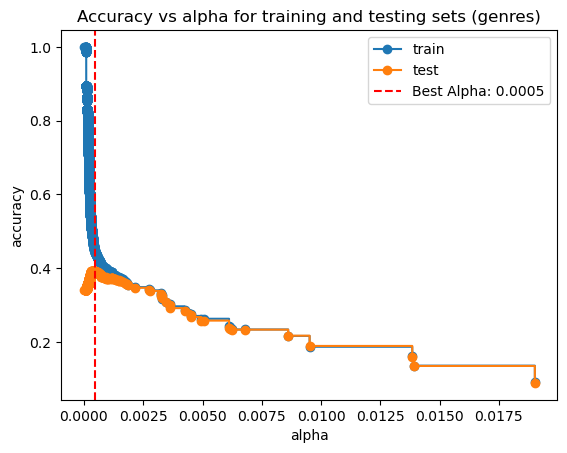

In [53]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets (genres)")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()

# Find the index where the maximum testing accuracy occurs
best_alpha_idx = test_scores.index(max(test_scores))

# Draw a vertical line at the corresponding alpha value
best_alpha = ccp_alphas[best_alpha_idx]
ax.axvline(x=best_alpha, color='r', linestyle='--', label=f'Best Alpha: {best_alpha:.4f}')
ax.legend()

plt.show()

### Post-Pruned Classification 

In [35]:
dtp = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0005,criterion='gini', min_samples_leaf=20, max_depth=12, min_samples_split=50)
dtp.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0005, max_depth=12, min_samples_leaf=20,
                       min_samples_split=50, random_state=0)

In [36]:
y_test_pred = dtp.predict(X_test)

In [37]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 0.4827619047619048
Train F1-score [0.33299697 0.68805704 0.53839365 0.30735456 0.34532374 0.56137012
 0.4702381  0.56840391 0.48218724 0.39166667 0.31317495 0.40232751
 0.45855759 0.53249097 0.477842   0.4873817  0.77623762 0.21187427
 0.70651204 0.44863732]

Test Accuracy 0.38266666666666665
Test F1-score [0.1875     0.67741935 0.42105263 0.17073171 0.25935162 0.45176471
 0.32227488 0.41758242 0.34653465 0.23866348 0.20588235 0.30452675
 0.42962963 0.42987805 0.38770686 0.42222222 0.75376884 0.15909091
 0.59016393 0.30727763]


In [38]:
print(classification_report(y_test, y_test_pred))

               precision    recall  f1-score   support

     afrobeat       0.23      0.16      0.19       225
  black-metal       0.70      0.65      0.68       225
    bluegrass       0.46      0.39      0.42       225
       brazil       0.27      0.12      0.17       225
    breakbeat       0.30      0.23      0.26       225
chicago-house       0.48      0.43      0.45       225
       disney       0.35      0.30      0.32       225
        forro       0.36      0.51      0.42       225
        happy       0.28      0.47      0.35       225
          idm       0.26      0.22      0.24       225
       indian       0.23      0.19      0.21       225
   industrial       0.28      0.33      0.30       225
      iranian       0.48      0.39      0.43       225
      j-dance       0.33      0.63      0.43       225
       j-idol       0.41      0.36      0.39       225
     mandopop       0.33      0.59      0.42       225
        sleep       0.87      0.67      0.75       225
      spa

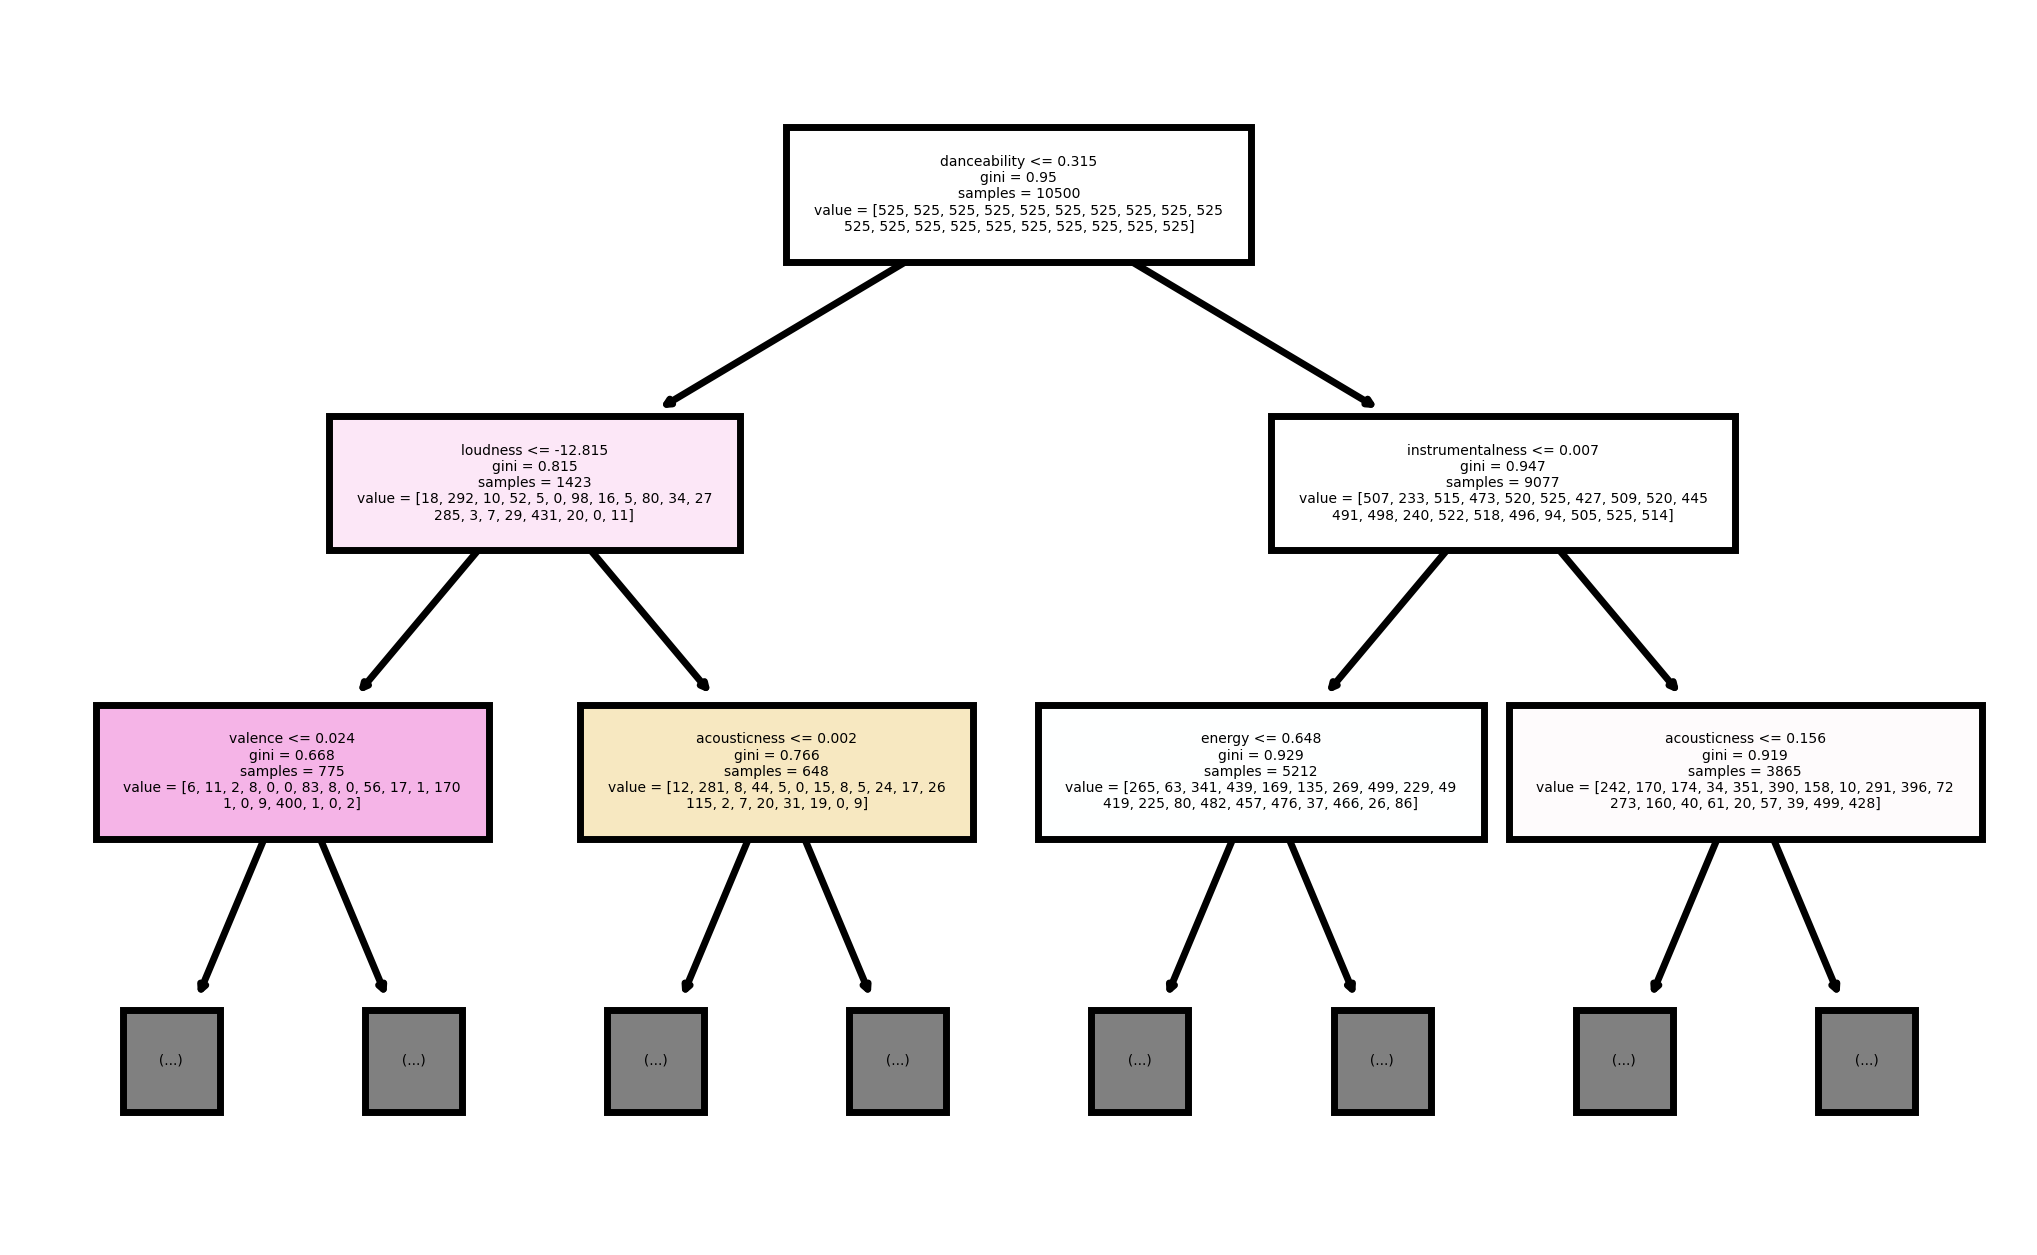

In [39]:
plt.figure(figsize=(5, 3), dpi=500)
plt.title('Decision Tree for Genres (Validation)')
plot_tree(dtp, max_depth=2, feature_names=attributes, filled=True, fontsize=2)
plt.savefig('Decision tree VAL PostP.png')
plt.show()

### Model Evaluation

In [40]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

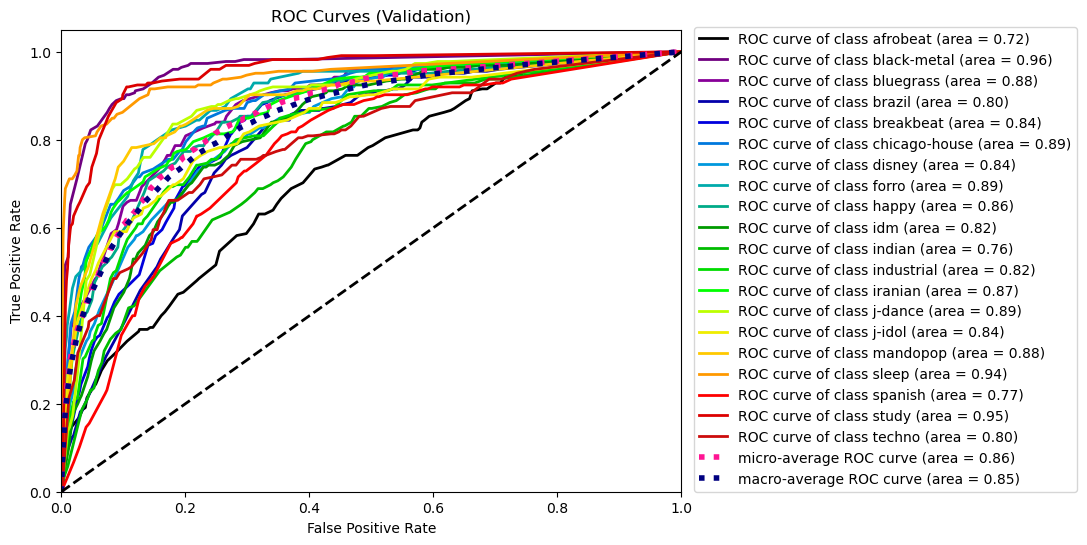

In [41]:
plot_roc(y_test, dtp.predict_proba(X_test), figsize=(8,6))
plt.title('ROC Curves (Validation)')
plt.legend(loc='lower left', bbox_to_anchor=(1.02, 0), borderaxespad=0)
plt.show()

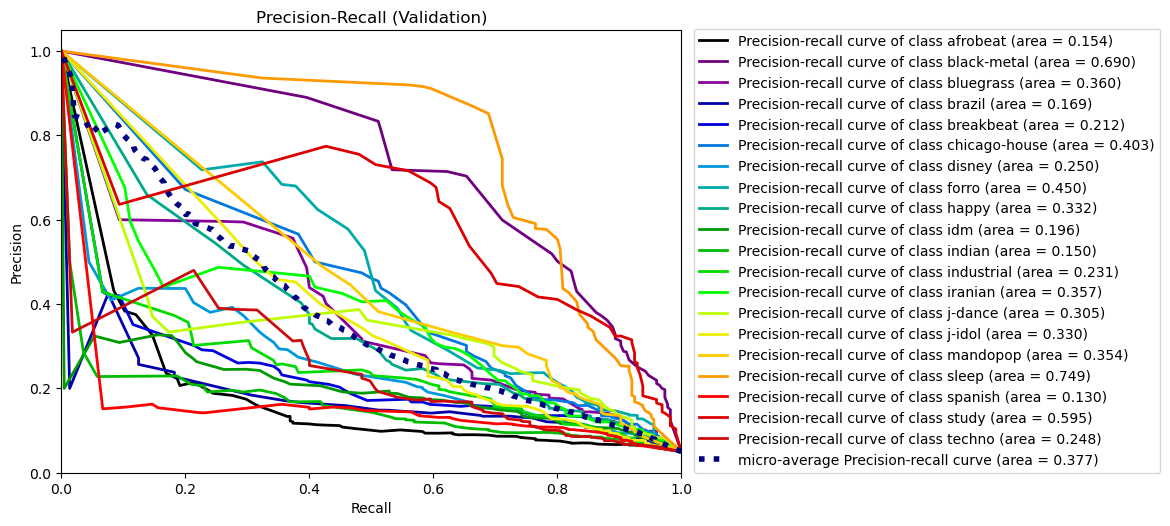

In [42]:
plot_precision_recall(y_test, dtp.predict_proba(X_test), figsize=(8,5.75))
plt.title('Precision-Recall (Validation)')
plt.legend(loc='lower left', bbox_to_anchor=(1.02, 0), borderaxespad=0)
plt.show()

### Feature Importance

In [43]:
zipped = zip(attributes, dtp.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

danceability 0.1961142052116148
loudness 0.1476523613809476
acousticness 0.13297508552368315
instrumentalness 0.12103087360429837
valence 0.11987363870232425
energy 0.09814969118551337
tempo 0.09542680706443962
speechiness 0.07269528189533014
liveness 0.016082055431848652
key 0.0


In [44]:
dt.feature_importances_

array([0.17765528, 0.10276012, 0.10324536, 0.13435405, 0.13611882,
       0.07686972, 0.11377858, 0.031107  , 0.11880917, 0.00530191])

In [45]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 12,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 20,
 'min_samples_split': 50,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [46]:
dt.predict_proba(X_test)

array([[0.08510638, 0.        , 0.36170213, ..., 0.14893617, 0.        ,
        0.        ],
       [0.04545455, 0.        , 0.02272727, ..., 0.        , 0.13636364,
        0.11363636],
       [0.20895522, 0.        , 0.        , ..., 0.14179104, 0.00746269,
        0.04477612],
       ...,
       [0.        , 0.17647059, 0.        , ..., 0.02941176, 0.        ,
        0.02941176],
       [0.0483871 , 0.        , 0.03225806, ..., 0.06451613, 0.        ,
        0.        ],
       [0.04      , 0.        , 0.        , ..., 0.        , 0.        ,
        0.08      ]])

In [47]:
from sklearn.metrics import precision_score
precision_score(y_test,y_test_pred, average='micro')

0.38266666666666665

In [48]:
precision_score(y_test,y_test_pred, average='macro')

0.38790877576278404

In [49]:
feature_importance = pd.DataFrame(dtp.feature_importances_, index = attributes).sort_values(0, ascending=False)
feature_importance

0
danceability      0.196114
loudness          0.147652
acousticness      0.132975
instrumentalness  0.121031
valence           0.119874
energy            0.098150
tempo             0.095427
speechiness       0.072695
liveness          0.016082
key               0.000000

<Axes: title={'center': 'Feature importance (Genres - post pruned)'}>

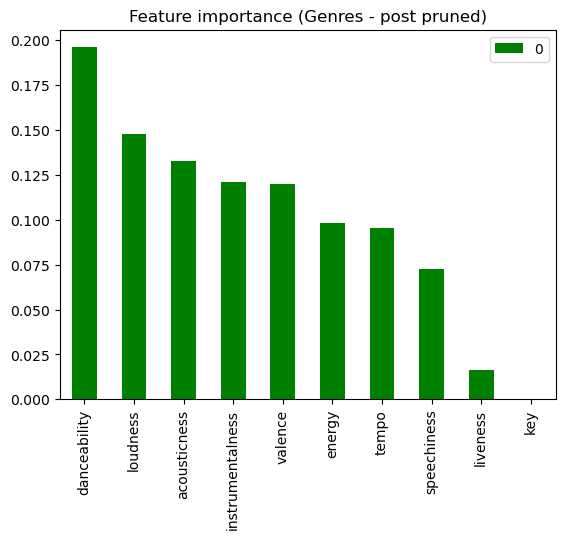

In [50]:
feature_importance.plot(kind='bar', color='green', title='Feature importance (Genres - post pruned)')

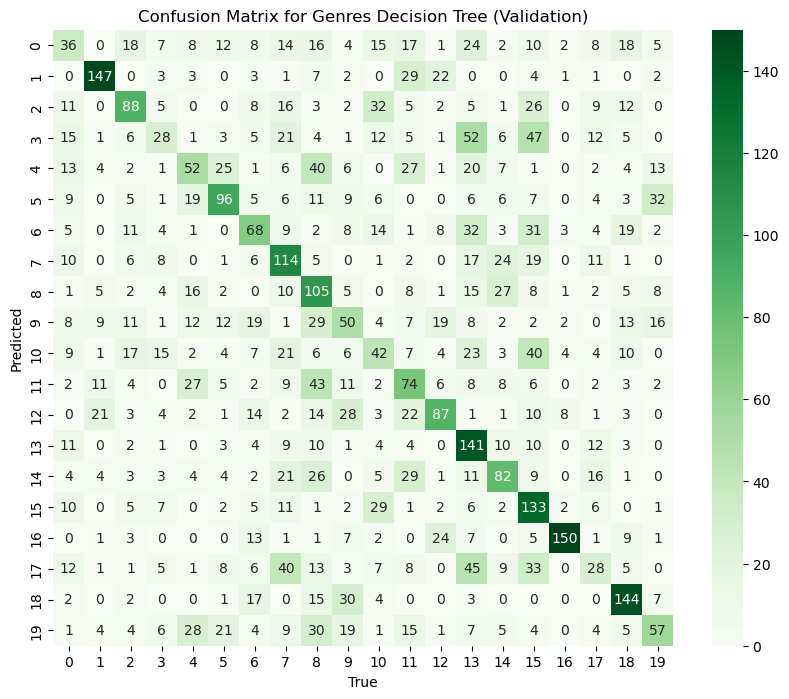

In [51]:
cf = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
plt.title('Confusion Matrix for Genres Decision Tree (Validation)')
sns.heatmap(cf, annot=True, cmap="Greens", fmt='d')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()